# Assignment 3

In [ ]:
import numpy as np

## Section 1

In [ ]:
# implementing bayes with two hypotheses
def bayesFunction(p_h, p_d_h, p_d_noth):
    marginalization = p_h*p_d_h + (1-p_h)*p_d_noth
    p_h_d = (p_h * p_d_h)/marginalization
    return p_h_d

In [ ]:
# self test:
A = bayesFunction(0.1, 0.9, 0.3)
B = bayesFunction(0.9, 0.9, 0.3)
C = bayesFunction(0.9, 0.3, 0.9)
D = bayesFunction(0.001, 0.99, 0.02)
E = bayesFunction(0.3, 0.5, 0.5)

# TODO this only works when rounding
[round(A, 3), round(B,2), round(C, 3), round(D, 3), round(E, 3)] == [0.25, 0.96, 0.75, 0.047, 0.3]

True

In [ ]:
def bayesFunctionMultipleHypothesis(prior_probs, likelihoods):
    """

    :param prior_probs: vector of prior probabilities of all possible hypotheses.
    :param likelihoods: vector of all likelihood functions of the data given these hypotheses.
    :return: vector of resulting outcomes
    """

    denom = np.multiply(prior_probs,likelihoods)
    num = sum(np.multiply(prior_probs,likelihoods))
    posteriors = denom/num

    return posteriors

In [ ]:
A = bayesFunctionMultipleHypothesis([0.1,0.9], [0.9, 0.3]) #0.25
B = bayesFunctionMultipleHypothesis([0.9, 0.1], [0.9, 0.3]) #0.96
C = bayesFunctionMultipleHypothesis([0.9, 0.1], [0.3, 0.9]) #0.75
D = bayesFunctionMultipleHypothesis([0.001, 0.999], [0.99, 0.02]) #0.047
E = bayesFunctionMultipleHypothesis([0.3,0.7], [0.5, 0.5]) #0.3
F = bayesFunctionMultipleHypothesis([0.4,0.3, 0.3], [0.99, 0.9, 0.2]) #P_h1_givenD: 0.545
G = bayesFunctionMultipleHypothesis([0.4,0.3, 0.3], [0.9, 0.9, 0.2]) #P_h1_givenD: 0.522
H = bayesFunctionMultipleHypothesis([0.3,0.3, 0.4], [0.9, 0.9, 0.2]) #P_h1_givenD: 0.435
I = bayesFunctionMultipleHypothesis([0.3,0.3, 0.4], [0.9, 0.2, 0.2]) #P_h1_givenD: 0.659
J = bayesFunctionMultipleHypothesis([0.4,0.2, 0.2, 0.2], [0.9, 0.3, 0.3, 0.3]) #P_h1_givenD: 0.667
K = bayesFunctionMultipleHypothesis([0.4,0.2, 0.2, 0.2], [0.9, 0.6, 0.3, 0.3]) #P_h1_givenD: 0.6
L = bayesFunctionMultipleHypothesis([0.01,0.2, 0.2, 0.2], [0.99, 0.01, 0.01, 0.01]) #P_h1_givenD: 0.623

print(A, " ", B, " ", C, " ", D, " ", E, " ", F, " ", G, " ", H, " ", I, " ", J, " ", K, " ", L)

[0.25 0.75]   [0.96428571 0.03571429]   [0.75 0.25]   [0.0472103 0.9527897]   [0.3 0.7]   [0.54545455 0.37190083 0.08264463]   [0.52173913 0.39130435 0.08695652]   [0.43548387 0.43548387 0.12903226]   [0.65853659 0.14634146 0.19512195]   [0.66666667 0.11111111 0.11111111 0.11111111]   [0.6 0.2 0.1 0.1]   [0.62264151 0.12578616 0.12578616 0.12578616]


In [ ]:
def bayesFactor(posteriors, priors):
    if sum(posteriors) != 1:
        raise Exception("The sum of all posteriors must be equal to 1!")

    # 1 vs not 1
    bayes_factors = [(posteriors[0]*(1-priors[0]))/((1-posteriors[0])*priors[0])]

    for posterior, prior in zip(posteriors[1:], priors[1:]):
        bayes_factors.append((posteriors[0]*prior)/(posterior*priors[0]))

    return bayes_factors


In [ ]:
bf = bayesFactor([0.9,0.05,0.05], [0.2, 0.6,0.2]) # 36, 54, 18
print(bf)
bf2 = bayesFactor([0.85,0.05,0.1], [0.2, 0.6,0.2]) # 22.66666667, 51, 8.5
print(bf2)
bf3 = bayesFactor([0.15,0.35,0.5], [0.4, 0.3,0.3]) # 0.264705882352941, 0.321428571428571, 0.225
print(bf3)

bf4 = bayesFactor([0.35,0.15,0.5], [0.3, 0.4,0.3]) # 1.25641025641026, 3.11111111111111, 0.7
print(bf4)

[36.00000000000001, 53.99999999999999, 18.0]
[22.666666666666664, 50.99999999999999, 8.499999999999998]
[0.2647058823529411, 0.32142857142857145, 0.22499999999999998]
[1.2564102564102562, 3.1111111111111107, 0.7]


### Blackboard Question 1.1

**A** Calculate the posterior value that people can see in the future under the data.
    Assume:
        a. The prior probability that people can see in the future is equal to not seeing in the future: 50%
        b. The probability to observe this data under the hypothesis that people can see in the future is 0.531
        c. The probability to observe this data under the hypothesis that people cannot see in the future is 0.52 (this captures the intuition that values around 0.5 are likely when fully guessing)

In [ ]:
n = 100 # number participants
prior = 0.5 #P(H_fut) = P(H_noFut)
p_Future = 0.531 # hypothesis: people can see into the future; P(D|H_fut)
p_noFuture = 0.52 # hypothesis: people cannot see into the future;  P(D|H_noFut)

posterior_exp1 = bayesFunction(prior,p_Future,p_noFuture) # P(H_fut|D)
posterior_exp1_nofut = bayesFunction(prior,p_noFuture,p_Future) # P(H_noFut|D)

print("The Posterior Probability is: ", posterior_exp1)

The Posterior Probability is:  0.5052331113225499


**B** What is the Bayes factor? (BFpeople can see in the future, not see in the future)

In [ ]:
bf = bayesFactor([round(posterior_exp1, 14), round(posterior_exp1_nofut, 14)], [prior, prior])

print("Bayes Factor: ", bf)

Bayes Factor:  [1.0211538461538463, 1.0211538461538463]


C. Eric-Jan, a more skeptic researcher, thinks the prior probability that people can look into the future is 0.001. What are the posterior odds for such a skeptic researcher?

In [ ]:
prior_skeptic = 0.001 # hypothesis: people can see into the future; P(D|H_fut)


posterior_skeptic = bayesFunction(prior_skeptic,p_Future,p_noFuture) # P(H_fut|D)
posterior_skeptic_nofut = bayesFunction(1-prior_skeptic,p_noFuture,p_Future) # P(H_noFut|D)

# P(H|D)/P(!H|D)
posterior_odds = posterior_skeptic/posterior_skeptic_nofut

print("The posterior odds are: ", posterior_odds)

The posterior odds are:  0.0010221760221760222


D. The experiment is replicated three times by different researchers, independently. So, the conditional probabilities are estimated independently. The priors are updated based on the outcomes of earlier experiments, starting with the outcome of the initial experiment. The relevant other data is in the table below. For each experiment give the new posteriors of P(Hpeople see in the future | Data)

In [ ]:
posterior_exp2 = bayesFunction(posterior_exp1,0.471,0.520) # P(H_fut|D)
posterior_exp3 = bayesFunction(posterior_exp2,0.491,0.65) # P(H_fut|D)
posterior_exp4 = bayesFunction(posterior_exp3,0.505,0.70) # P(H_fut|D)

print("2: ", posterior_exp2)
print("3: ", posterior_exp3)
print("4: ", posterior_exp4)

2:  0.48050051777037883
3:  0.4113068034046174
4:  0.3351267396958185


**E.**  Using the Bayes Factor, argue briefly whether the data convinces that people can look into the future.

In [ ]:
bf_2 = 0.471/0.520
bf_3 = 0.491/0.65
bf_4 = 0.505/0.7

print("BF 2: ", bf_2)
print("BF 3: ", bf_3)
print("BF 4: ", bf_4)

BF 2:  0.9057692307692307
BF 3:  0.7553846153846153
BF 4:  0.7214285714285715


# Section 3

In [ ]:
import model_fitting_BS_MSE
import model_fitting_RF_MSE

0  participants were considered!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
0  participants were considered!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
bic_bs = model_fitting_BS_MSE.init_fit_BS()

(0, 60, 3)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
bic_rf = model_fitting_RF_MSE.init_fit_RF()

In [ ]:
print(bic_bs)
print(bic_rf)

# Bonus Section


In [ ]:
# Dictionary of all BIC variants that should be calculated
bic_variants = {"BS_1":7, "BS_2":8, "BS_3":9, "BS_4":10, "RF_1":6, "RF_2":8}

for v in bic_variants:
    if "BS"in v:
        bic_variants[v] = (bic_variants[v], model_fitting_BS_MSE.init_fit_BS(bic_variants[v]))
    else:
        bic_variants[v] = (bic_variants[v], model_fitting_RF_MSE.init_fit_RF(bic_variants[v]))

print("These are the BIC Scores of all BIC variants: ")
print(bic_variants)

In [ ]:
print("These are the BIC Scores of all BIC variants: ")
print(bic_variants)

84 participants found.
N = 1, Beta = 0.1, Mean MSE = 0.04291801974854547
N = 1, Beta = 0.5, Mean MSE = 0.03306668231079975


<ipython-input-4-942b9207a6cb>:58: RuntimeWarning: invalid value encountered in scalar divide
  a / (a + c), c / (a + c), b / (b + d), d / (b + d)]


N = 1, Beta = 1, Mean MSE = 0.031133898402813644


<ipython-input-4-942b9207a6cb>:57: RuntimeWarning: invalid value encountered in scalar divide
  a / (a + b), b / (a + b), c / (c + d), d / (c + d),


N = 1, Beta = 2, Mean MSE = 0.03231227958378652
N = 1, Beta = 5, Mean MSE = 0.0366699258799914
N = 2, Beta = 0.1, Mean MSE = 0.04598036180983492
N = 2, Beta = 0.5, Mean MSE = 0.03721696705824089
N = 2, Beta = 1, Mean MSE = 0.033066648484464736
N = 2, Beta = 2, Mean MSE = 0.031134087635649454
N = 2, Beta = 5, Mean MSE = 0.03323700649837971
N = 5, Beta = 0.1, Mean MSE = 0.048269035051929754
N = 5, Beta = 0.5, Mean MSE = 0.04291844246602339
N = 5, Beta = 1, Mean MSE = 0.038696989970041513
N = 5, Beta = 2, Mean MSE = 0.03425816356691802
N = 5, Beta = 5, Mean MSE = 0.031134274851059195
N = 10, Beta = 0.1, Mean MSE = 0.04912479558077992
N = 10, Beta = 0.5, Mean MSE = 0.0459806773450806
N = 10, Beta = 1, Mean MSE = 0.042918325135792634
N = 10, Beta = 2, Mean MSE = 0.03869649660850675
N = 10, Beta = 5, Mean MSE = 0.03306646962954586
N = 50, Beta = 0.1, Mean MSE = 0.04984772815209791
N = 50, Beta = 0.5, Mean MSE = 0.04912508084806423
N = 50, Beta = 1, Mean MSE = 0.048268586083666284
N = 50, Bet

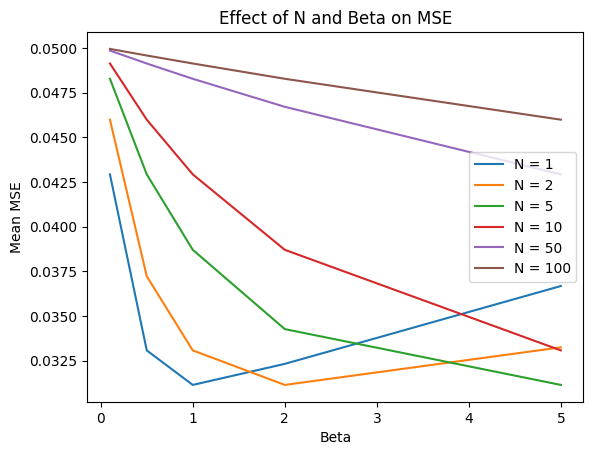

In [4]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define global variables for N, beta, and testdata
GLOBAL_N = None
GLOBAL_BETA = None

# Function to clean data
def clean_data():
    """
    Load and process participant data.
    Returns:
        pData: Cleaned probability estimates
        queryOrder: Query order used in the experiment
    """
    all_data = glob.glob('/content/drive/MyDrive/all_data/*.csv')  # Update path as needed
    numPar = len(all_data)
    print(f"{numPar} participants found.")

    est = np.zeros((numPar, 60, 3))  # Assuming 60 queries and 3 repetitions
    queryOrder = []
    neg, land, lor, lg = ' not', ' and', ' or', ' given'
    eventAs = [' cold', ' windy', ' warm']
    eventBs = [' rainy', ' cloudy', ' snowy']

    for A, B in zip(eventAs, eventBs):
        queryOrder.extend([A, B, neg + A, neg + B,
                           A + land + B, B + land + neg + A,
                           A + land + neg + B, neg + A + land + neg + B,
                           A + lor + B, B + lor + neg + A,
                           A + lor + neg + B, neg + A + lor + neg + B,
                           A + lg + B, neg + A + lg + B,
                           A + lg + neg + B, neg + A + lg + neg + B,
                           B + lg + A, neg + B + lg + A,
                           B + lg + neg + A, neg + B + lg + neg + A])

    for i, fname in enumerate(all_data):
        df = pd.read_csv(fname)
        for j, q in enumerate(queryOrder):
            nowEst = df[df['querydetail'] == q]['estimate']
            nowEstValues = nowEst.values / 100
            for k in range(3):
                est[i, j, k] = nowEstValues[k]

    return est, queryOrder

# Function to calculate true probabilities
def get_truePr_BS(a, b, c, d):
    base = a + b + c + d
    return [(a + c) / base, (a + b) / base, (b + d) / base, (c + d) / base,
            a / base, b / base, c / base, d / base,
            (a + b + c) / base, (a + b + d) / base,
            (a + c + d) / base, (b + c + d) / base,
            a / (a + b), b / (a + b), c / (c + d), d / (c + d),
            a / (a + c), c / (a + c), b / (b + d), d / (b + d)]

# Modify generative model to use global N and beta values
def generativeModel_BS_fixed(params):
    a, b, c, d = [0, 0], [0, 0], [0, 0], [0, 0]
    a[0], b[0], c[0], d[0], a[1], b[1], c[1], d[1] = params
    MSE = 0

    allpredmeans = np.zeros((40,))

    for iter in range(2):
        sum_of_truePr = a[iter] + b[iter] + c[iter] + d[iter]
        MSE += (sum_of_truePr / 100 - 1) ** 2 / 2

        truePr = get_truePr_BS(a[iter], b[iter], c[iter], d[iter])

        for i, trueP in enumerate(truePr):
            if i < 4 or i >= 12:  # simple and conditionals
                allpredmeans[i + iter * 20] = trueP * GLOBAL_N / (GLOBAL_N + 2 * GLOBAL_BETA) + GLOBAL_BETA / (
                            GLOBAL_N + 2 * GLOBAL_BETA)
            else:  # conjunctions and disjunctions
                allpredmeans[i + iter * 20] = trueP * GLOBAL_N / (GLOBAL_N + 2 * GLOBAL_BETA) + GLOBAL_BETA / (
                            GLOBAL_N + 2 * GLOBAL_BETA)

    return allpredmeans, MSE

# Function to calculate MSE
def MSE_BS_fixed(params):
    allpredmeans, MSE = generativeModel_BS_fixed(params)
    for i in range(len(allpredmeans)):
        currentdata = testdata[i, :].flatten()
        MSE += np.mean((allpredmeans[i] - currentdata) ** 2) / 40
    return MSE

# Function to explore N and beta systematically
def explore_N_beta():
    global GLOBAL_N, GLOBAL_BETA, testdata

    N_values = [1, 2, 5, 10, 50, 100]
    beta_values = [0.1, 0.5, 1, 2, 5]

    results = []

    for N in N_values:
        for beta in beta_values:
            GLOBAL_N = N
            GLOBAL_BETA = beta

            mse_list = []

            for ipar in range(10):  # Example: First 10 participants
                testdata = pData[ipar, :, :]
                bnds = [(0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100),
                        (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100)]

                fit_all_data = differential_evolution(MSE_BS_fixed, bounds=bnds, popsize=10, disp=False, tol=1e-4)
                mse_list.append(fit_all_data.fun)

            mean_mse = np.mean(mse_list)
            print(f"N = {N}, Beta = {beta}, Mean MSE = {mean_mse}")
            results.append((N, beta, mean_mse))

    return results

# Function to visualize results
def plot_results(results):
    df = pd.DataFrame(results, columns=["N", "Beta", "MSE"])

    for N in df["N"].unique():
        subset = df[df["N"] == N]
        plt.plot(subset["Beta"], subset["MSE"], label=f"N = {N}")

    plt.xlabel("Beta")
    plt.ylabel("Mean MSE")
    plt.title("Effect of N and Beta on MSE")
    plt.legend()
    plt.show()

# Run analysis and plot
pData, queryOrder = clean_data()
results = explore_N_beta()
plot_results(results)
